## Getting Required Data Corpus

In [1]:
shakespeare_corpus = open('dataset/shakespeare1.txt').read()

In [2]:
shakespeare_corpus = shakespeare_corpus.lower().split('\n')

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import tensorflow.keras.utils as ku 
import tensorflow as tf

In [4]:
tokenizer = Tokenizer()

In [5]:
tokenizer.fit_on_texts(shakespeare_corpus)
word_index = tokenizer.word_index

In [6]:
len(word_index)

2527

In [7]:
total_num_words = len(word_index) + 1

In [8]:
input_sequences = []
for line in shakespeare_corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [9]:
max_sequence_len = max([len(x) for x in input_sequences])

input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
label = ku.to_categorical(label, num_classes=total_num_words)

In [11]:
from tensorflow.keras.layers import Embedding, CuDNNLSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [13]:
model = Sequential()
model.add(Embedding(total_num_words, 100, input_length=max_sequence_len-1))
model.add(CuDNNLSTM(150, return_sequences = True))
model.add(Dropout(0.2))
model.add(CuDNNLSTM(100))
model.add(Dense(total_num_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_num_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           252800    
_________________________________________________________________
cu_dnnlstm (CuDNNLSTM)       (None, 10, 150)           151200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 150)           0         
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 100)               100800    
_________________________________________________________________
dense (Dense)                (None, 1264)              127664    
_________________________________________________________________
dense_1 (Dense)      

In [14]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
10053/10053 [==============================] - 16s 2ms/sample - loss: 6.9589 - acc: 0.02034s 
Epoch 2/100
10053/10053 [==============================] - 7s 686us/sample - loss: 6.4350 - acc: 0.0237
Epoch 3/100
10053/10053 [==============================] - 7s 695us/sample - loss: 6.3526 - acc: 0.0234s - loss: 6.3558 - acc: 0.02
Epoch 4/100
10053/10053 [==============================] - 7s 694us/sample - loss: 6.2922 - acc: 0.0246
Epoch 5/100
10053/10053 [==============================] - 7s 691us/sample - loss: 6.2357 - acc: 0.0273
Epoch 6/100
10053/10053 [==============================] - 7s 695us/sample - loss: 6.1526 - acc: 0.0318
Epoch 7/100
10053/10053 [==============================] - 7s 691us/sample - loss: 6.0684 - acc: 0.0385
Epoch 8/100
10053/10053 [==============================] - 7s 690us/sample - loss: 5.9843 - acc: 0.0421
Epoch 9/100
10053/10053 [==============================] - 7s 703us/sample - loss: 5.9202 

10053/10053 [==============================] - 8s 751us/sample - loss: 2.2853 - acc: 0.5355s - - ETA: 0s - loss: 2.2787 - acc:  - ETA: 0s - loss: 2.2842 - acc: 0.53
Epoch 75/100
10053/10053 [==============================] - 8s 770us/sample - loss: 2.2305 - acc: 0.5459
Epoch 76/100
10053/10053 [==============================] - 8s 755us/sample - loss: 2.2108 - acc: 0.5565s - loss: 2.1519  - ETA: 3s - l - ETA:
Epoch 77/100
10053/10053 [==============================] - 8s 750us/sample - loss: 2.1768 - acc: 0.5666s - los
Epoch 78/100
10053/10053 [==============================] - 8s 771us/sample - loss: 2.1528 - acc: 0.5740s - loss: 2.12 - ETA: 0s - loss:
Epoch 79/100
10053/10053 [==============================] - 7s 718us/sample - loss: 2.1238 - acc: 0.5782
Epoch 80/100
10053/10053 [==============================] - 7s 699us/sample - loss: 2.1074 - acc: 0.5841
Epoch 81/100
10053/10053 [==============================] - 7s 698us/sample - loss: 2.0805 - acc: 0.5885
Epoch 82/100
10053/1005

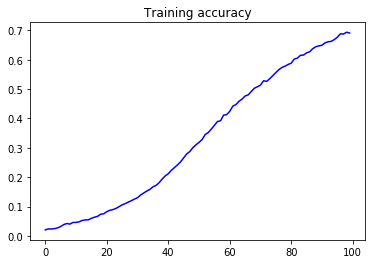

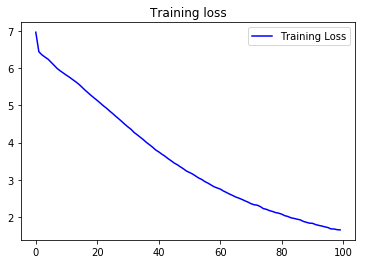

In [15]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [17]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 500
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope that else when ten grief sheds rare find kind another place die of thee die thee thee make die die see hence bright green decay curious rage strong decay lie hid can thence see forth grossly afloat play to boast now not say you done their green be brought afloat mute away life go life life thee life me me find contains tend born made away young days nor weeds date mother mother mother mother mother other stelled brought stelled appear stelled mother stelled mother stelled mother mother mother stelled brought mother brought brought brought brought brought brought brought brought brought brought stelled mother stelled mother mother mother mother mother mother scope beside their cross light beside their cross light grew stelled mother date scope beside their weeds light beside their cross light grew stelled mother history kind kind kind kind fulness every time die time die go life life hours hours hours one remain broken crime tend remain scope 